In [1]:
import os
import copy
import pandas as pd
import numpy as np
import feather
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)

In [118]:
DATA_PATH = '../data/'
df =  feather.read_dataframe(DATA_PATH + 'housing_with_location')

In [119]:
featured_districts = ['Brookline',
            'Cambridge',
            'East Boston',
            'Fitchburg',
             'Fall River',
             'Jamaica Plain',
             'Lowell',
             'Lynn',
             'Malden',
             'Medfold',
             'New Bedford',
            'Quincy',
             'Revere',
             'Somerville',
             'Watertown',
            
            ]

In [120]:
featured_df = df[df.location.isin(featured_districts)]

In [121]:
district_prices = featured_df.groupby('location')['price'].agg([np.mean, np.median])
district_prices.reset_index(inplace=True)
district_prices

,location,mean,median
0,Brookline,1561.416107,1300.0
1,Cambridge,1528.720317,1300.0
2,East Boston,1616.186047,1895.0
3,Fall River,2540.833333,2250.0
4,Fitchburg,1249.230769,1300.0
5,Jamaica Plain,1342.395833,995.0
6,Lowell,750.000000,750.0
7,Lynn,1502.928571,999.0
8,Malden,1256.521739,900.0
9,New Bedford,1369.000000,1369.0


Mean and median relation

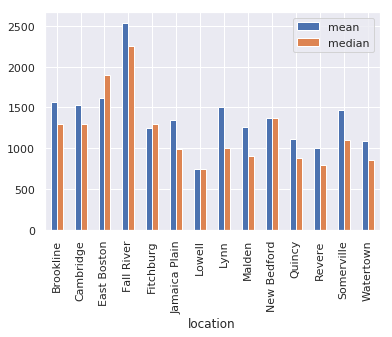

In [122]:
district_prices.plot(kind='bar', x='location')

In [123]:
m = folium.Map(location=[42.34878, -71.10445], zoom_start=8)
boston_geojson = os.path.join(DATA_PATH, '12_brook_districts')
folium.Choropleth(
    geo_data=boston_geojson,
    name='All prices',
    data=district_prices,
    columns = ['location', 'mean'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Avg price',
    title='All prices',
).add_to(m);


In [124]:
district_prices_supply = featured_df[featured_df.supply == True].groupby('location')['price'].agg(np.mean)
folium.Choropleth(
    geo_data=boston_geojson,
    name='Supply',
    data=district_prices_supply,
    key_on='feature.id',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Avg price Supply',
    title='Supply',
).add_to(m);

In [125]:
district_prices_supply = featured_df[featured_df.supply == False].groupby('location')['price'].agg(np.mean)
folium.Choropleth(
    geo_data=boston_geojson,
    name='Demand',
    data=district_prices_supply,
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Avg price Demand',
    title='Demand',
).add_to(m);

In [126]:
folium.LayerControl().add_to(m)
m

In [127]:
district_intence = featured_df.groupby('location').location.count()
district_intence

location
Brookline        149
Cambridge        379
East Boston       43
Fall River         6
Fitchburg         13
Jamaica Plain     48
Lowell             1
Lynn              14
Malden            23
New Bedford       43
Quincy            28
Revere            17
Somerville       199
Watertown         23
Name: location, dtype: int64

In [128]:
m = folium.Map(location=[42.34878, -71.10445], zoom_start=11)
boston_geojson = os.path.join(DATA_PATH, '12_brook_districts')
folium.Choropleth(
    geo_data=boston_geojson,
    name='Intence',
    data=district_intence,
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Intence',
    title='Intence',
).add_to(m);

In [129]:
district_intence_supply = featured_df[featured_df.supply == True].groupby('location').location.count()
folium.Choropleth(
    geo_data=boston_geojson,
    name='Supply Intence',
    data=district_intence_supply,
    key_on='feature.id',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Supply Intence',
    title='Supply Intence',
).add_to(m);

In [130]:
district_intence_demand = featured_df[featured_df.supply == False].groupby('location').location.count()
folium.Choropleth(
    geo_data=boston_geojson,
    name='Demand Intence',
    data=district_intence_demand,
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Demand Intence',
    title='Demand Intence',
).add_to(m);

In [131]:
folium.LayerControl().add_to(m)
m

Relations between supply and demand.

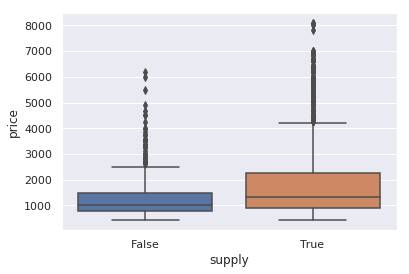

In [132]:
sns.boxplot(x="supply", y="price", 
            data=df, orient="v");

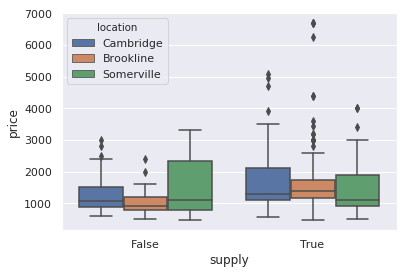

In [133]:
df_featured = df[df.location.isin(['Cambridge','Brookline', 'Somerville'])]
sns.boxplot(x="supply", y="price", hue="location",
            data=df_featured, orient="v");

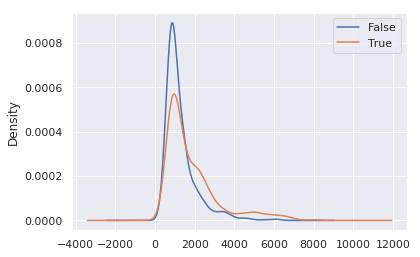

In [134]:
df.groupby('supply').price.plot.kde()
plt.legend();

Animals support

In [135]:
def get_key_substring(text, key):
    if key in text:
        key_index = text.index(key)
        return text[key_index-20:key_index+20 + len(key)]
    else:
        return None
df[df.text.str.contains('friendly')].text.apply(lambda t: get_key_substring(t,'friendly')).sample(5)

1555                      er queer or queer - friendly .
1411    itional storage pet friendly won ' t last area a
1406    room apartment with friendly roommates ( you wil
1944    room apartment with friendly roommates ( you wil
2507     in living . - pets friendly apartment with a sm
Name: text, dtype: object

In [136]:
no_animals = ['no pets','not allowed']
print(df.text.str.contains('|'.join(no_animals)).sum())
df[df.text.str.contains('|'.join(no_animals))].text.apply(lambda t: get_key_substring(t,'no pets')).head(5)

119


28     / clean roommates . no pets , couples , smoking
39      . street parking . no pets . move in date 2 / 
49      a clean home , and no pets . access to parking
102    te with a small dog no pets unless registered a
103    te with a small dog no pets unless registered a
Name: text, dtype: object

In [137]:
df.loc[df.text.str.contains('|'.join(no_animals)),'pets'] = 'NO'
df.loc[df.text.str.contains('friendly'),'pets'] = 'YES'

In [138]:
df['pets'].value_counts()

YES    408
NO     106
Name: pets, dtype: int64

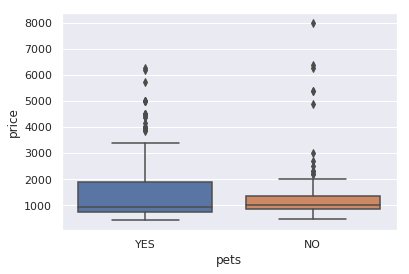

In [139]:
sns.boxplot(x="pets", y="price", 
            data=df, orient="v");